In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import copy

plt.rcParams['text.usetex'] = True


# Helper functions for bagreading!    
def find_topic_name_and_index(topic_name, csv_files): 
    for i, name in enumerate(csv_files): 
        if topic_name in name: 
            print("index: {}; topic_name: {}".format(i, name))
            return i
            
def find_bag_by_name(name, bag_list): 
    for i, bag_name in enumerate(bag_list): 
        if name in bag_name: 
            if ".bag" in bag_name:
                return i

def create_csv(bagreader_object):
    csv_files = []
    for topic in bagreader_object.topics:
        data = bagreader_object.message_by_topic(topic)
        csv_files.append(data)
    return csv_files

def read_bags(bag_folder): 
    bag_paths = []
    for bag_name in os.listdir(bag_folder): 
        bag_paths.append("{}/{}".format(bag_folder, bag_name))
    return bag_paths

def find_closest_values(s, x):
    idx = (np.abs(s - x)).argmin()
    return idx
    
def crop_df_time(df, start_time, end_time):
    start_index = find_closest_values(df['Time'], start_time)
    end_index = find_closest_values(df['Time'], end_time)
    new_df = df[start_index:end_index]
    new_df = new_df.reset_index()
    return new_df

def upsample_dataframes(df1, df2):
    # Check which dataframe has fewer measurements
    if len(df1) < len(df2):
        shorter_df, longer_df = df1, df2
    else:
        shorter_df, longer_df = df2, df1

    # Calculate the ratio for upsampling
    ratio = len(longer_df) // len(shorter_df)

    # Upsample the shorter dataframe to match the length of the longer dataframe
    upsampled_shorter_df = pd.concat([shorter_df] * ratio, ignore_index=True)

    # Trim the longer dataframe to match the length of the shorter dataframe
    trimmed_longer_df = longer_df.iloc[:len(upsampled_shorter_df)]

    return trimmed_longer_df, upsampled_shorter_df

def scale_time(df): 
    
    df_ = copy.deepcopy(df)
    df_['Time'] = df['Time'] - df['Time'][0]
    return df_


def plot_position(pandas_odometry): 
    t = pandas_odometry['Time']
    x = pandas_odometry['pose.pose.position.x']
    y = pandas_odometry['pose.pose.position.y']
    z = pandas_odometry['pose.pose.position.z']
    
    plt.figure(figsize=(14, 5))

    # Plot positions over time
    plt.plot(t, x, label='X Position', color='red')
    plt.plot(t, y, label='Y Position', color='green')
    plt.plot(t, z, label='Z Position', color='blue')

    # Set axis labels and a title
    plt.xlabel('Time (t)')
    plt.ylabel('Position[m]')
    plt.title('Position')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    
def get_relative_position(odom1, odom2): 
    
    t1 = odom1['Time']; t2 = odom2['Time']
    len_t1 = len(t1); len_t2 = len(t2)
    
    if len(t1) > len(t2): 
        len_t1 = len(t2)
    else: 
        len_t2 = len(t1)
        
    print(len_t1)
    print(len_t2)
        
    x1 = odom1['pose.pose.position.x'][:len_t1]
    y1 = odom1['pose.pose.position.y'][:len_t1]
    z1 = odom1['pose.pose.position.z'][:len_t1]
    
    x2 = odom2['pose.pose.position.x'][:len_t2]
    y2 = odom2['pose.pose.position.y'][:len_t2]
    z2 = odom2['pose.pose.position.z'][:len_t2]
    t1 = t1[:len_t1]
    t2 = t2[:len_t2]
    
    t = t1
    x = x1-x2
    y = y1-y2
    z = z1-z2 
    
    return t,x,y,z

def extract_positions(odom1, not_scale=None): 
    
    if not_scale:
        pass
    else:
        odom1 = scale_time(odom1)
    t = odom1['Time']
    x = odom1['pose.pose.position.x']
    y = odom1['pose.pose.position.y']
    z = odom1['pose.pose.position.z']
    return t, x, y, z

def extract_position(pose, not_scale=None): 
    
    if not_scale:
        pass
    else:
        pose = scale_time(pose)
    t = pose['Time']
    x = pose['position.x']
    y = pose['position.y']
    z = pose['position.z']
    return t, x, y, z

def extract_ref(pose, not_scale=None):
    if not_scale:
        pass
    else:
        pose = scale_time(pose)
    t = pose['Time']
    x = pose['pose.position.x']
    y = pose['pose.position.y']
    z = pose['pose.position.z']
    return t,x,y,z

def extract_vel_ref(data, not_scale=None): 
    data = scale_time(data)
    t = data['Time']
    x = data['x']
    y = data['y']
    z = data['z']
    return extract_vel_ref

def extract_velocities(odom1, not_scale=None):
    
    odom1 = scale_time(odom1)
    t = odom1['Time']
    vx = odom1['twist.twist.linear.x']
    vy = odom1['twist.twist.linear.y']
    vz = odom1['twist.twist.linear.z']
    return t, vx, vy, vz

def extract_vel_ref(odom1, not_scale=None):
    
    odom1 = scale_time(odom1)
    t = odom1['Time']
    vx = odom1['twist.linear.x']
    vy = odom1['twist.linear.y']
    vz = odom1['twist.linear.z']
    return t, vx, vy, vz

def extract_orientations(odom, not_scale=None): 
    
    if not_scale:
        pass
    else:
        odom = scale_time(odom)
    qx = odom['pose.pose.orientation.x']
    qy = odom['pose.pose.orientation.y']
    qz = odom['pose.pose.orientation.z']
    qw = odom['pose.pose.orientation.w']
    

/home/zozan/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = "."
bags = read_bags(path)
servo_i = find_bag_by_name("servo_franka", bags)
b = bagreader(bags[servo_i])
b_csv = create_csv(b)

[INFO]  Successfully created the data folder ./servo_franka_data2.


In [3]:
cur_pose = pd.read_csv(b_csv[0])
twist_cmd = pd.read_csv(b_csv[1])
target_pose = pd.read_csv(b_csv[2])

In [4]:
t, x, y, z = extract_position(cur_pose)
tc, xc, yc, zc = extract_ref(target_pose)
tv, xv, yv, zv = extract_vel_ref(twist_cmd)

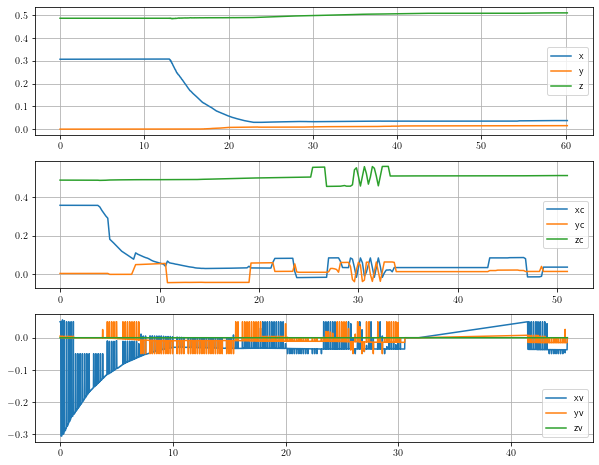

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(t, x, label="x"); ax[0].plot(t, y, label="y"); ax[0].plot(t, z, label="z")
ax[0].legend()
ax[0].grid()
ax[1].plot(tc, xc, label="xc"); ax[1].plot(tc, yc, label="yc"); ax[1].plot(tc, zc, label="zc")
ax[1].legend()
ax[1].grid()
ax[2].plot(tv, xv, label="xv"); ax[2].plot(tv, yv, label="yv"); ax[2].plot(tv, zv, label="zv")
ax[2].legend()
ax[2].grid()
plt.show()

In [8]:
path = "."
bags = read_bags(path)
servo_i = find_bag_by_name("servo_franka_data2", bags)
b = bagreader(bags[servo_i])
b_csv = create_csv(b)

[INFO]  Data folder ./servo_franka_data2 already exists. Not creating.


In [9]:
cur_pose = pd.read_csv(b_csv[0])
twist_cmd = pd.read_csv(b_csv[1])
target_pose = pd.read_csv(b_csv[2])

t, x, y, z = extract_position(cur_pose)
tc, xc, yc, zc = extract_ref(target_pose)
tv, xv, yv, zv = extract_vel_ref(twist_cmd)

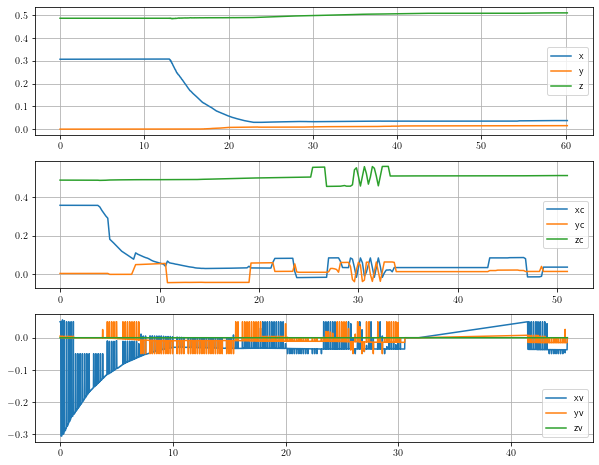

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(t, x, label="x"); ax[0].plot(t, y, label="y"); ax[0].plot(t, z, label="z")
ax[0].legend()
ax[0].grid()
ax[1].plot(tc, xc, label="xc"); ax[1].plot(tc, yc, label="yc"); ax[1].plot(tc, zc, label="zc")
ax[1].legend()
ax[1].grid()
ax[2].plot(tv, xv, label="xv"); ax[2].plot(tv, yv, label="yv"); ax[2].plot(tv, zv, label="zv")
ax[2].legend()
ax[2].grid()
plt.show()

[INFO]  Data folder ./servo_franka_data3 already exists. Not creating.


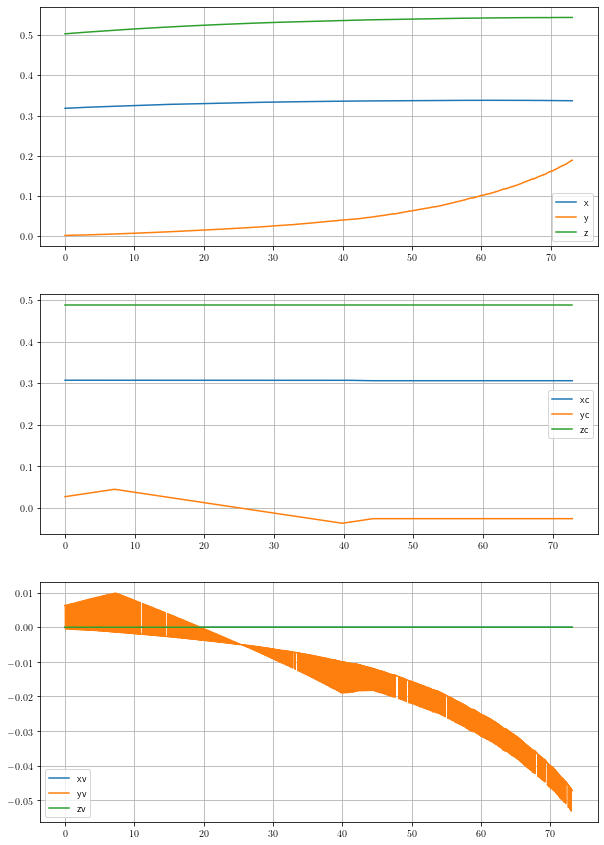

In [12]:
path = "."
bags = read_bags(path)
servo_i = find_bag_by_name("servo_franka_data3", bags)
b = bagreader(bags[servo_i])
b_csv = create_csv(b)

cur_pose = pd.read_csv(b_csv[0])
twist_cmd = pd.read_csv(b_csv[1])
target_pose = pd.read_csv(b_csv[2])

t, x, y, z = extract_position(cur_pose)
tc, xc, yc, zc = extract_ref(target_pose)
tv, xv, yv, zv = extract_vel_ref(twist_cmd)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax[0].plot(t, x, label="x"); ax[0].plot(t, y, label="y"); ax[0].plot(t, z, label="z")
ax[0].legend()
ax[0].grid()
ax[1].plot(tc, xc, label="xc"); ax[1].plot(tc, yc, label="yc"); ax[1].plot(tc, zc, label="zc")
ax[1].legend()
ax[1].grid()
ax[2].plot(tv, xv, label="xv"); ax[2].plot(tv, yv, label="yv"); ax[2].plot(tv, zv, label="zv")
ax[2].legend()
ax[2].grid()
plt.show()

[INFO]  Successfully created the data folder ./servo_franka_data4.


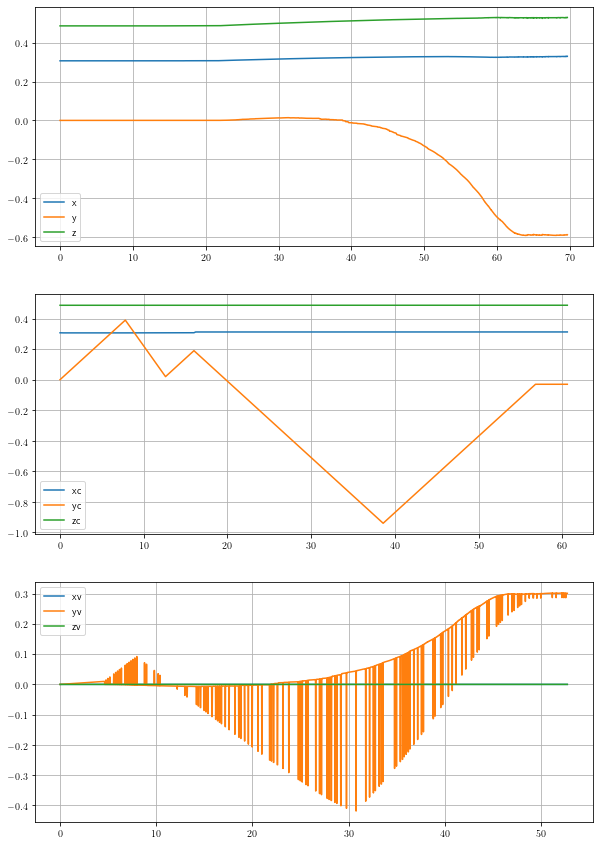

In [13]:
path = "."
bags = read_bags(path)
servo_i = find_bag_by_name("servo_franka_data4", bags)
b = bagreader(bags[servo_i])
b_csv = create_csv(b)

cur_pose = pd.read_csv(b_csv[0])
twist_cmd = pd.read_csv(b_csv[1])
target_pose = pd.read_csv(b_csv[2])

t, x, y, z = extract_position(cur_pose)
tc, xc, yc, zc = extract_ref(target_pose)
tv, xv, yv, zv = extract_vel_ref(twist_cmd)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax[0].plot(t, x, label="x"); ax[0].plot(t, y, label="y"); ax[0].plot(t, z, label="z")
ax[0].legend()
ax[0].grid()
ax[1].plot(tc, xc, label="xc"); ax[1].plot(tc, yc, label="yc"); ax[1].plot(tc, zc, label="zc")
ax[1].legend()
ax[1].grid()
ax[2].plot(tv, xv, label="xv"); ax[2].plot(tv, yv, label="yv"); ax[2].plot(tv, zv, label="zv")
ax[2].legend()
ax[2].grid()
plt.show()